In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [3]:
# CIFAR-10 데이터셋 적재
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10

# x_train의 크기 [50000, 32, 32, 3] -> 4차원 텐서
# 첫 번째 차원: 데이터셋에 있는 이미지의 인덱스
# 두, 세번째 차원: 이미지 높이와 너비
# 네 번째 차원: 컬러 채널(RGB = 3)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 이미지 정수 레이블을 원-핫 인코딩 벡터로 바꾼다.
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

##Sequential model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = Sequential([
                    Dense(200, activation='relu', input_shape=(32, 32, 3))
                    Flatten(),
                    Dense(150, activation='relu'),
                    Dense(10, activation='softmax')
])

## 함수형 API

In [6]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

In [8]:
input_layer = Input(shape=(32, 32, 3))

x = Flatten()(input_layer)

x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=10, activation='softmax')(x)

model = Model(input_layer, output_layer)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 200)               614600    
                                                                 
 dense_2 (Dense)             (None, 150)               30150     
                                                                 
 dense_3 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.optimizers import Adam

In [13]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=opt, 
              metrics=['accuracy']
              )

In [14]:
model.fit(x_train,          # 원본 이미지 데이터
          y_train,          # 원-핫 인코딩된 클래스 레이블
          batch_size=32,
          epochs=10,
          shuffle=True
          )

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8533 - accuracy: 0.3286
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6682 - accuracy: 0.4044
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5872 - accuracy: 0.4366
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5336 - accuracy: 0.4527
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4906 - accuracy: 0.4698
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4590 - accuracy: 0.4803
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4353 - accuracy: 0.4888
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4107 - accuracy: 0.4989
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3886 - accuracy: 0.5065
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.369

In [16]:
model.evaluate(x_test, y_test)
# 출력 [손실값, 정확도]

313/313 [==============================] - 1s 4ms/step - loss: 1.4500 - accuracy: 0.4809


[1.4500402212142944, 0.48089998960494995]

In [17]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) # [10000, 10] 크기의 배열 -> 샘플마다 10개의 클래스 확률을 담은 벡터 반환

# argmax함수를 사용해 확률을 하나의 예측 결과로 바꾼다.
# axis= -1 : 마지막 차원(클래스 차원)으로 배열을 압축하라
# preds_single의 크기는 [10000, 1]이 된다.
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

In [18]:
import matplotlib.pyplot as plt

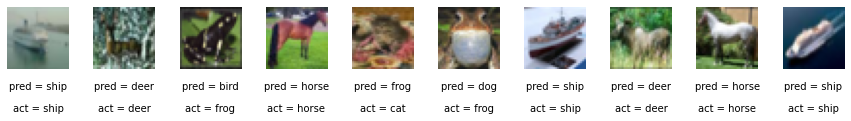

In [19]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1, n_to_show, i+1)
  ax.axis('off')
  ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
  ax.imshow(img)